# Exploratory Analysis: California housing dataset.

***Stephen Sani***

>***To identify actions that must be completed to prepare the housing data set for machine learning through exploratory data analysis.***

Loading required packages

In [1]:
import os.path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

import util_dirs
import util_files

## Getting the Data

The following actions are performed to obtain the data set:
1. Setup project directories
2. Download archive
2. Extract file from archive
3. Read file into a dataframe named housing

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
data_root = os.path.join('.', 'resources', 'download')
file_name = 'housing.csv'

# Setup project directories
util_dirs.create_project_dirs()

# Download archive file from url
tgz = util_files.download_file(url)

# Extract archive file
util_files.extract(tgz)

# Read data
housing = pd.read_csv(os.path.join(data_root, file_name))


Directory already exist: resources
Directory already exist: resources/data
Directory already exist: resources/styles
Directory already exist: resources/images
Directory already exist: resources/download
Download: File already exists!


Extraction: Successful!


## Preview Data

Previewing the top 5 rows of the data

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Previewing 10 random samples of the data set

In [4]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17326,-120.08,34.64,18.0,2375.0,429.0,1048.0,369.0,4.2222,375000.0,NEAR OCEAN
9171,-118.66,34.43,9.0,2356.0,469.0,1556.0,386.0,3.7750,155000.0,INLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
9225,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,64300.0,INLAND
474,-122.28,37.86,52.0,2031.0,450.0,958.0,445.0,1.9327,169900.0,NEAR BAY
4524,-118.21,34.05,28.0,1841.0,809.0,3199.0,727.0,1.6319,151600.0,<1H OCEAN
19121,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,151600.0,<1H OCEAN
2478,-120.10,36.21,12.0,1462.0,356.0,1708.0,367.0,1.5086,64700.0,INLAND
6724,-118.12,34.13,52.0,2935.0,341.0,975.0,327.0,11.7060,500001.0,<1H OCEAN
11669,-118.01,33.86,29.0,2307.0,452.0,1218.0,402.0,3.4306,194200.0,<1H OCEAN


View technical information of housing data

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Observations:
1. Column names are simple and consistent
2. Data type of all but one are float: ocean_proximity is object
3. Only one variable have missing value: total_bedroom.


## Missing values

Previewing samples with missing values

In [6]:
# explore missing values in total_bedrooms
housing[housing['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Confirm that only one variable have missing values

In [7]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

This confirms that only total_bedrooms have missing values. 

The missing values can be filled. alternatively, all samples with missing values can be droped. 

Dropping missing values

In [8]:
# Collect all samples with missing values
missing = housing[housing['total_bedrooms'].isna()]
# Drop missing values
housing = housing.dropna(axis=0, how='any')
# Re-index
housing.index = range(housing.shape[0])

Reviewing the technical information on the housing dataset

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Visualize the distribution of total_bedrooms

<Axes: ylabel='Frequency'>

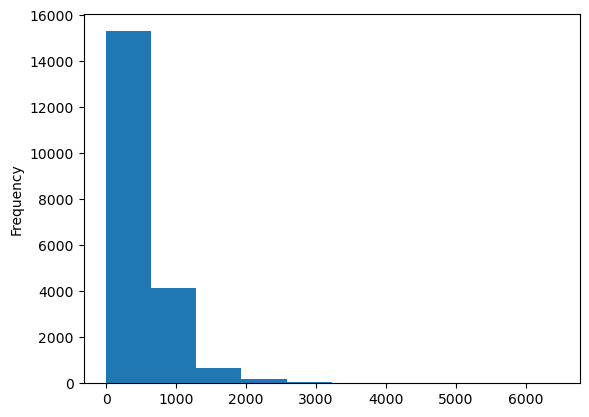

In [10]:
housing['total_bedrooms'].plot(kind='hist')

The distribution of total_bedrooms is right skewed

## Explore ocean_proximity

Previewing the unique classes in ocean_proximity

In [11]:
# Unique valeus in ocean_proximity
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Compute the distribution of of the samples by unique classes in ocean_proximity

In [12]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Visualize the proportions of classes in ocean_proximity

<Axes: xlabel='ocean_proximity'>

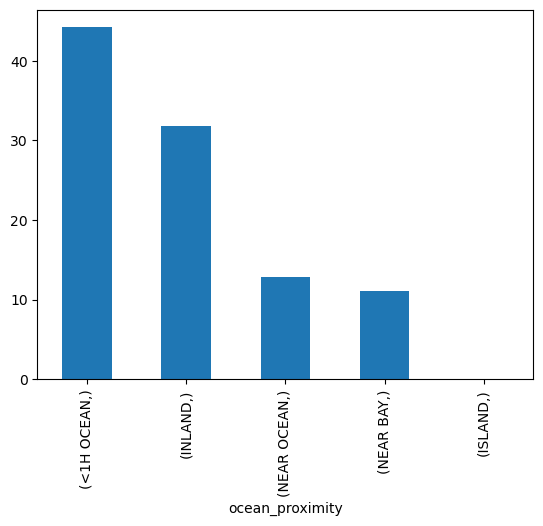

In [13]:
ocean_proximity_dist = housing[['ocean_proximity']].value_counts() * 100 / housing.shape[0]
ocean_proximity_dist.plot(kind="bar")

The class 'ISLAND' in ocen_proximity has the least samples. in addition, ocean_proximity has skewed classes

## Geo Location

Setup up to gain more insght from the data through various visualization

In [14]:
%matplotlib inline
style = './resources/styles/stephen_born.mplstyle'
logo = './resources/images/no_image.png'


Interested in the geolocation of the samples

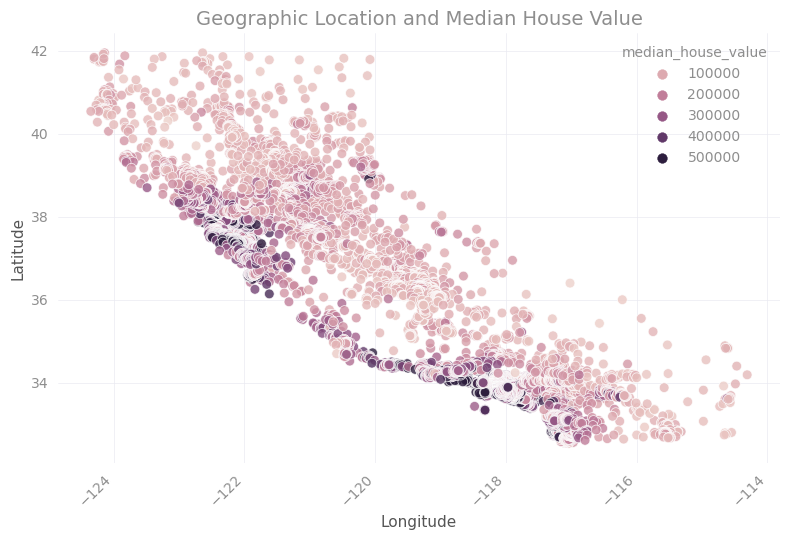

In [15]:
# Geographic Location and median_house_value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='longitude',
        y='latitude',
        hue='median_house_value',
        alpha=0.8
    )
    ax.set(
        title="Geographic Location and Median House Value",
        xlabel='Longitude',
        ylabel='Latitude',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Samples are categorized by their proximity to the ocean. Put ocean_proximity in context

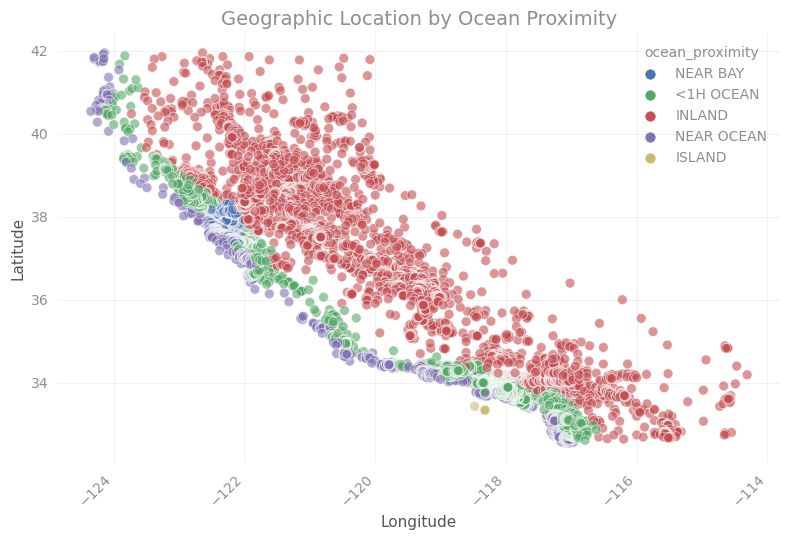

In [16]:
# Geographic location by ocean_proximity
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='longitude',
        y='latitude',
        hue='ocean_proximity',
        alpha=0.6
    )
    ax.set(
        title="Geographic Location by Ocean Proximity",
        xlabel='Longitude',
        ylabel='Latitude',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)


Observation
1. The order of the ocean_proximity don't match.
2. ocean_proximity seems like an ordered categorical variable. The correct order is ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']. In addition we must encode the ordered levels of this category for machine learning.

In [17]:
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category').cat.reorder_categories(
    ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
)

Recreate the same visualization with the correct order

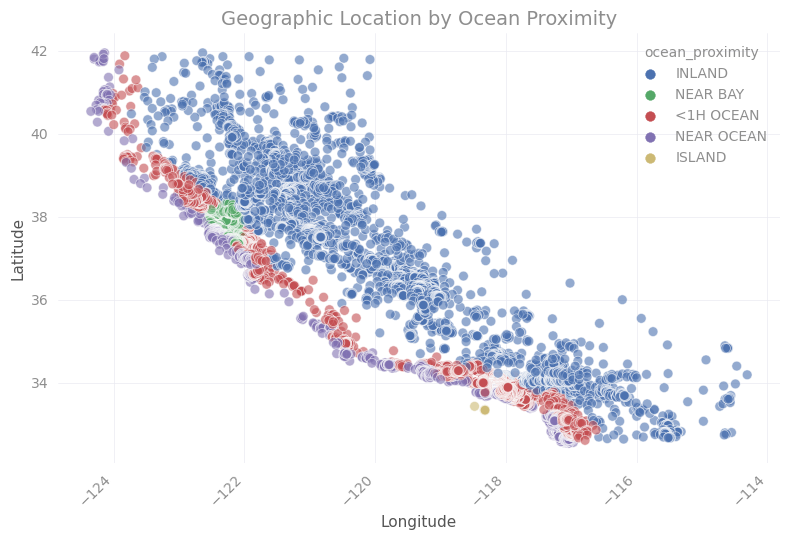

In [18]:
# Geographic location by ocean_proximity
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='longitude',
        y='latitude',
        hue='ocean_proximity',
        alpha=0.6
    )
    ax.set(
        title="Geographic Location by Ocean Proximity",
        xlabel='Longitude',
        ylabel='Latitude',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)

Ordinal or one-hot encoding could be used for the ocean_proximity variable.

In [19]:
# Showing one-hot encoding
coded = pd.DataFrame(np.zeros((housing.shape[0], 5)), columns=['ISLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'INLAND'])
for i in housing.index:
    clm = housing.loc[i, 'ocean_proximity']
    coded.loc[i, clm] = 1
coded.columns = ['island', 'near_ocean', '<1h_ocean', 'near_bay', 'inland']

housing = pd.concat([housing, coded], axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,island,near_ocean,<1h_ocean,near_bay,inland
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [20]:
# showing ordinal encoding
dict = {'ISLAND': 5, 'NEAR OCEAN': 4, '<1H OCEAN': 3, 'NEAR BAY': 2, 'INLAND': 1}
for i in dict.keys():
    housing.loc[housing['ocean_proximity'] == i, 'ord_ocean_proximity'] = dict[i]


## Data Visualization

Visualize the scatter matrix for all variables.

C:\Users\Sani\AppData\Local\Temp\ipykernel_5124\2074478003.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(housing.loc[:, ['longitude', 'latitude', 'housing_median_age', 'total_rooms',


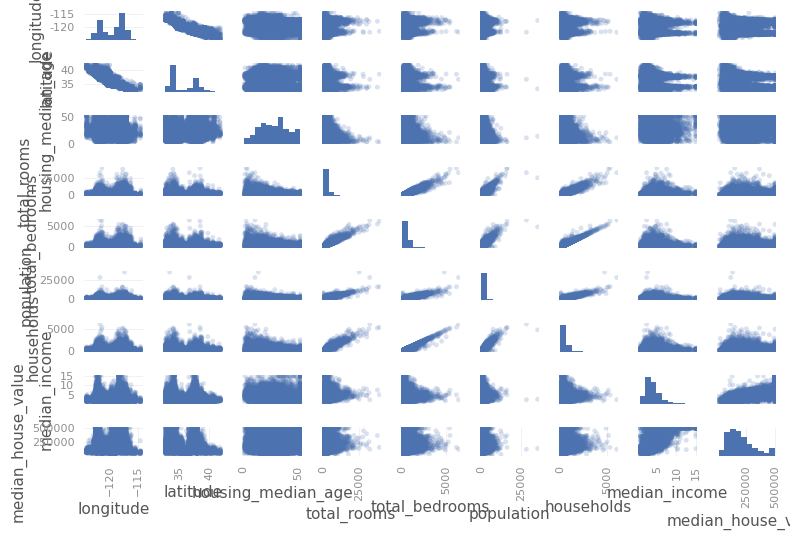

In [21]:
# Scatter matrix for all variables.
with mpl.style.context(style):
    fig, ax = plt.subplots()
    scatter_matrix(housing.loc[:, ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                           'total_bedrooms', 'population',	'households', 
                           'median_income', 'median_house_value']], alpha=0.2, ax=ax)

This visualization is too busy. 

Visualize the distribution of numeric features

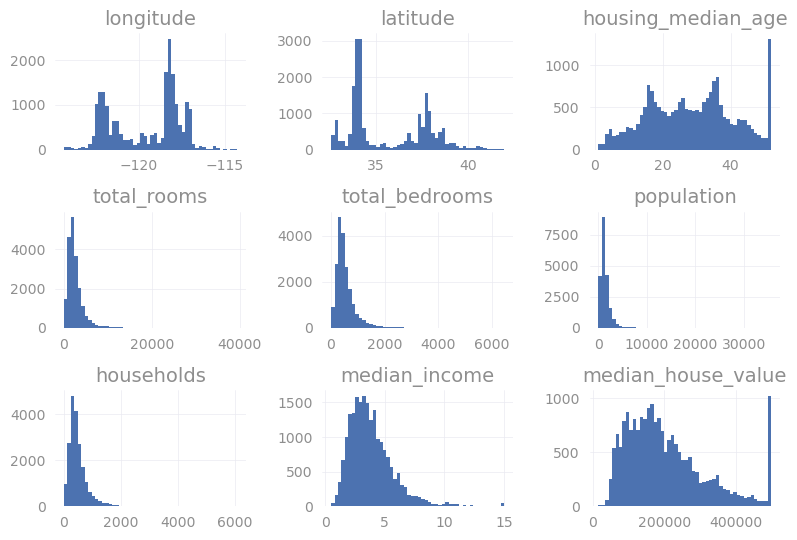

In [22]:
# Distribution of numeric features
with mpl.style.context(style):
    housing.loc[:, [
        'longitude', 'latitude', 'housing_median_age', 'total_rooms', 
        'total_bedrooms', 'population', 'households',	
        'median_income', 'median_house_value']
    ].hist(bins=50)

Observation:
1. housing_median_age is capped
2. median_income is capped and scaled
3. median_house_value is capped

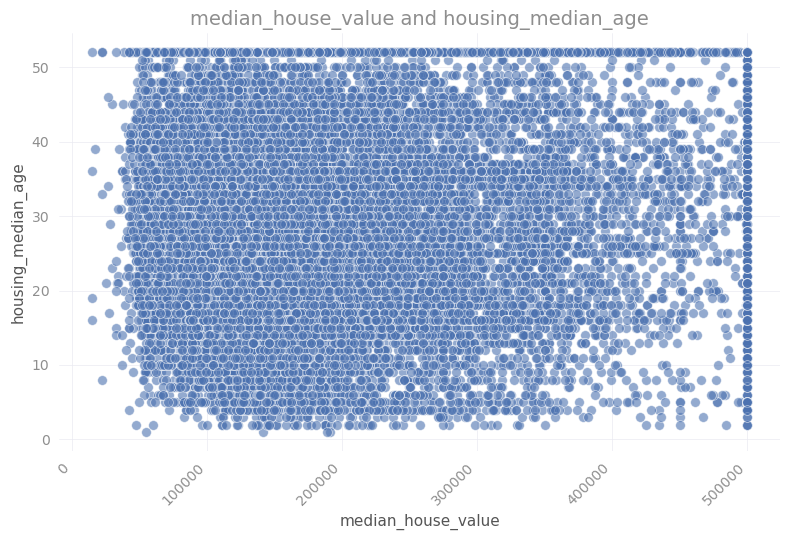

In [23]:
# median_house_value and housing_median_age
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='housing_median_age',
        alpha=0.6
    )
    ax.set(
        title="median_house_value and housing_median_age",
        xlabel='median_house_value',
        ylabel='housing_median_age',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)


Steps to take:
1. Remove example with capped housing_median_age
2. Remove example with capped median_income
3. Remove exampleswith capped median_house_value

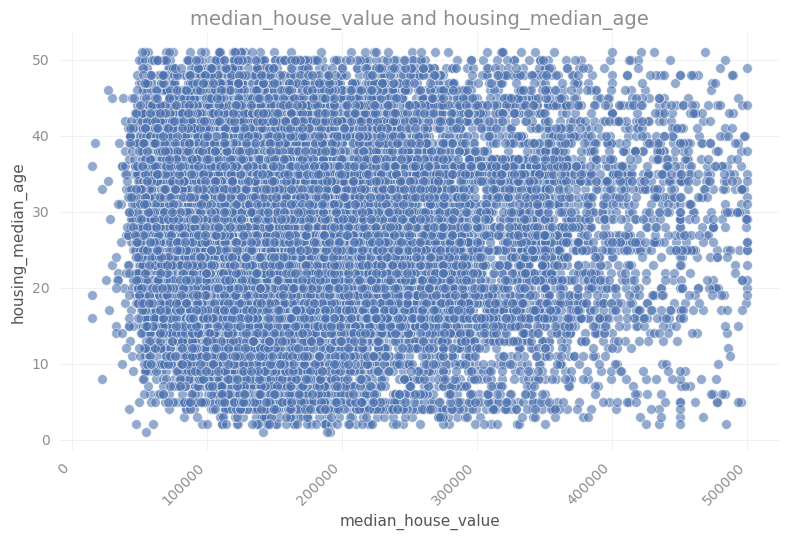

In [24]:
# Collect all samples with housing_median value of 500001
capped_medval = housing[housing['median_house_value'].isin([500001])]
# Remove examples with capped median_house_values
housing.drop(
    housing[housing['median_house_value'] == 500001].index,
    inplace=True,
    axis=0
)

# Collect all samples with median_income value of 15
capped_medinc = housing[housing['median_income'].isin([15])]
# Remove examples with capped median_income
housing.drop(
    housing[housing['median_income'] == 15].index,
    inplace=True,
    axis=0
)

# Collect all samples with housing_median_age value of 52
capped_medage = housing[housing['housing_median_age'].isin([52])]
# Remove examples with capped housing_median_age
housing.drop(
    housing[housing['housing_median_age'] == 52].index,
    inplace=True,
    axis=0
)
# median_house_value and housing_median_age
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='housing_median_age',
        alpha=0.6
    )
    ax.set(
        title="median_house_value and housing_median_age",
        xlabel='median_house_value',
        ylabel='housing_median_age',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)

Visualize median_income and median_house_value

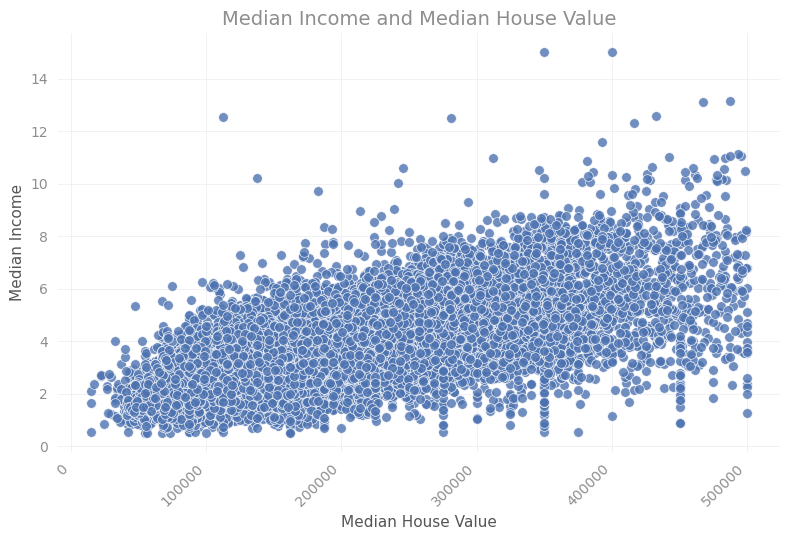

In [25]:
# median_income and median_house_value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='median_income',
        alpha=0.8
    )
    ax.set(
        title="Median Income and Median House Value",
        xlabel='Median House Value',
        ylabel='Median Income',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Also remove median_house_values capped at 275000, 350000, 450000 and 500000

In [26]:
# Collect all examples with capped median_house_values
capped_others = housing[housing['median_house_value'].isin([275000, 350000, 450000, 500000])]

# Remove examples with capped median_house_values
housing.drop(
    housing[housing['median_house_value'] == 275000].index,
    inplace=True,
    axis=0
)

housing.drop(
    housing[housing['median_house_value'] == 350000].index,
    inplace=True,
    axis=0
)

housing.drop(
    housing[housing['median_house_value'] == 450000].index,
    inplace=True,
    axis=0
)

housing.drop(
    housing[housing['median_house_value'] == 500000].index,
    inplace=True,
    axis=0
)

Visualize median_income and median_house_value again

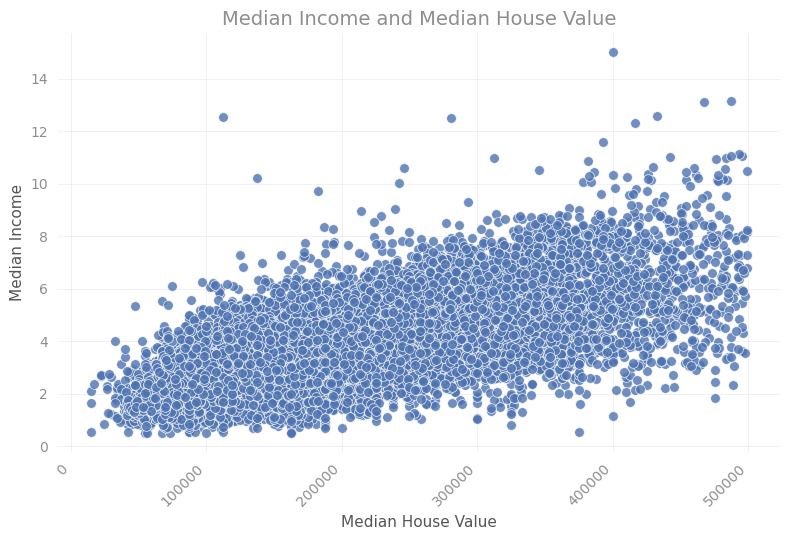

In [27]:
# median_income and median_house_value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='median_income',
        alpha=0.8
    )
    ax.set(
        title="Median Income and Median House Value",
        xlabel='Median House Value',
        ylabel='Median Income',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Visualize total_rooms and total_bedrooms by housing_median_age

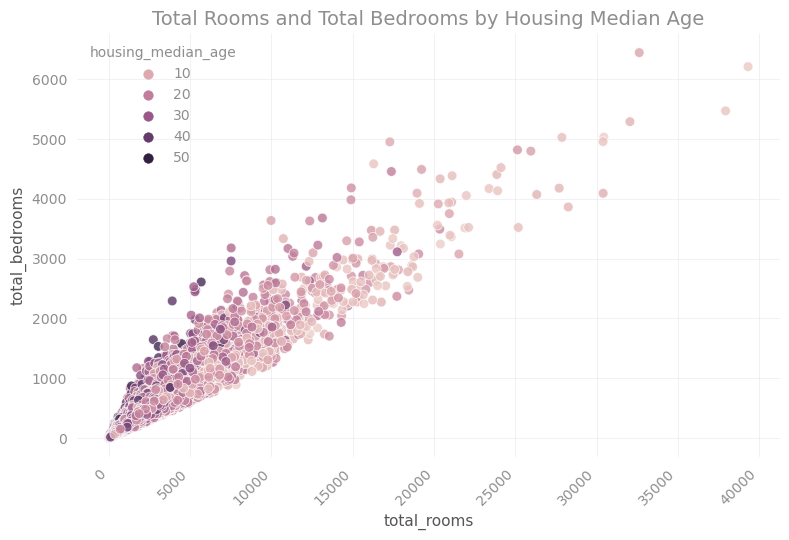

In [28]:
# Total Rooms and Total Bedrooms by Housing Median Age
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='total_rooms',
        y='total_bedrooms',
        hue='housing_median_age',
        alpha=0.8
    )
    ax.set(
        title="Total Rooms and Total Bedrooms by Housing Median Age",
        xlabel='total_rooms',
        ylabel='total_bedrooms',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Visualize total_rooms and total_bedrooms by median_house_value

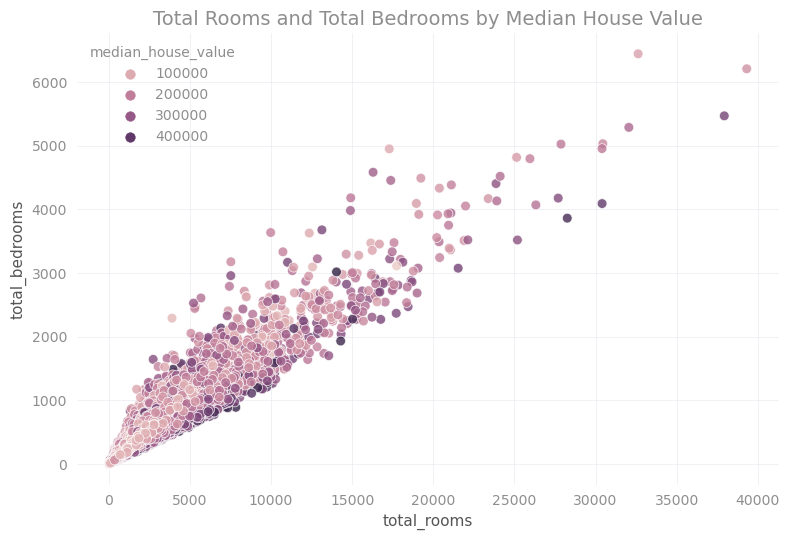

In [29]:
# Total Rooms and Total Bedrooms by Median House Value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='total_rooms',
        y='total_bedrooms',
        hue='median_house_value',
        alpha=0.8
    )
    ax.set(
        title="Total Rooms and Total Bedrooms by Median House Value",
        xlabel='total_rooms',
        ylabel='total_bedrooms',
    )

Visualize distribution of median_house_value

c:\Users\Sani\miniconda3\envs\mltf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


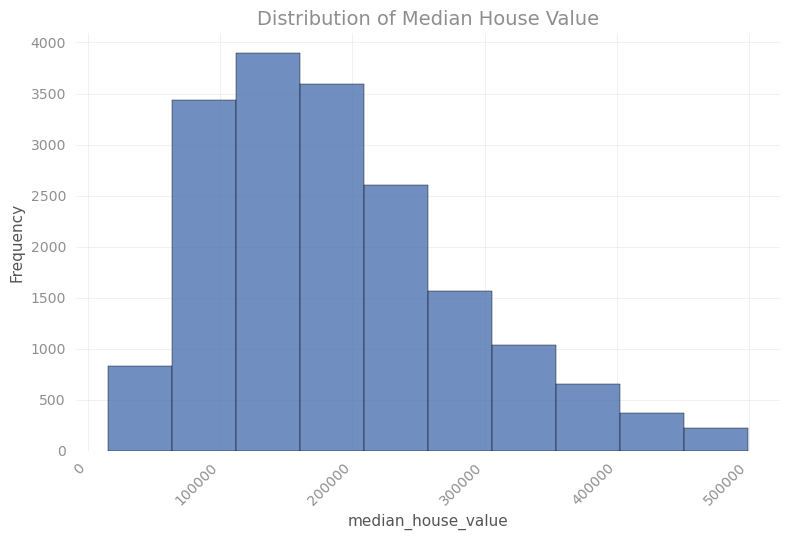

In [30]:
# Distribution of Median House Value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.histplot(
        data=housing,
        x='median_house_value',
        bins=10,
        alpha=0.8
    )
    ax.set(
        title="Distribution of Median House Value",
        ylabel='Frequency',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    # fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


## Feature Engineering

Review summary of distribution of ocean_proximity

In [31]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8143
INLAND        6277
NEAR OCEAN    2267
NEAR BAY      1532
ISLAND           1
Name: count, dtype: int64

At this stage, only one sample belong to the class 'ISLAND' in ocean_proximity. To remedy this, retrieve all samples for the class

In [32]:
removed = pd.concat([capped_medval, capped_medinc, capped_medage, capped_others], axis=0)
island = removed[removed['ocean_proximity'].isin(['ISLAND'])]
housing = pd.concat([housing, island], axis=0)
housing['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     8143
INLAND        6277
NEAR OCEAN    2267
NEAR BAY      1532
ISLAND           5
Name: count, dtype: int64

Review technical information for the prepared data

In [33]:
housing.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18224 entries, 0 to 18223
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                18224 non-null  int64   
 1   longitude            18224 non-null  float64 
 2   latitude             18224 non-null  float64 
 3   housing_median_age   18224 non-null  float64 
 4   total_rooms          18224 non-null  float64 
 5   total_bedrooms       18224 non-null  float64 
 6   population           18224 non-null  float64 
 7   households           18224 non-null  float64 
 8   median_income        18224 non-null  float64 
 9   median_house_value   18224 non-null  float64 
 10  ocean_proximity      18224 non-null  category
 11  island               18224 non-null  float64 
 12  near_ocean           18224 non-null  float64 
 13  <1h_ocean            18224 non-null  float64 
 14  near_bay             18224 non-null  float64 
 15  inland             

Compute summary descriptive statisticts for the dataset

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,island,near_ocean,<1h_ocean,near_bay,inland,ord_ocean_proximity
count,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000
mean,-119.484176,35.597189,26.980081,2677.522443,548.759164,1473.390639,509.366495,3.693833,188120.154576,0.000274,0.124396,0.446828,0.084065,0.344436,2.352008
std,1.980962,2.150609,11.435999,2231.679308,429.611290,1164.350451,389.665697,1.564753,94606.257105,0.016562,0.330042,0.497178,0.277493,0.475197,1.080497
min,-124.300000,32.540000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-121.540000,33.920000,17.000000,1463.000000,301.000000,815.000000,285.000000,2.538775,114800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-118.450000,34.240000,27.000000,2144.000000,442.500000,1207.000000,416.000000,3.469800,170400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,-117.970000,37.670000,36.000000,3185.000000,659.000000,1781.000000,614.000000,4.617225,240800.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


The current state of the data does not include any missing value.
Save the housing data set to .csv and proceed to explore new features. This version of the dataset could be the basis for machine learning.

In [35]:
# Save the data
housing.loc[:, [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 
    'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value'
]].to_csv(os.path.join('.', 'resources', 'data', 'housing_ready.csv'), index=False)

Explore some new features

In [36]:
# Feature Engineering: Create new features
housing['rooms_per_bedrooms'] = housing['total_rooms'] / housing['total_bedrooms']
housing['population_per_households'] = housing['population'] / housing['households']
housing['median_income_per_households'] = housing['median_income'] / housing['households']
housing['population_per_total_rooms'] = housing['population'] / housing['total_rooms']

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,island,near_ocean,<1h_ocean,near_bay,inland,ord_ocean_proximity,rooms_per_bedrooms,population_per_households,median_income_per_households,population_per_total_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0,2.0,6.821705,2.555556,0.066073,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0,2.0,6.418626,2.109842,0.007295,0.338217
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0,2.0,3.842105,2.026891,0.003496,0.472016
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0,2.0,3.957597,2.640152,0.008049,0.622321
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0,2.0,4.920879,2.362768,0.004752,0.442162


Visualize the distribution of all numeric features

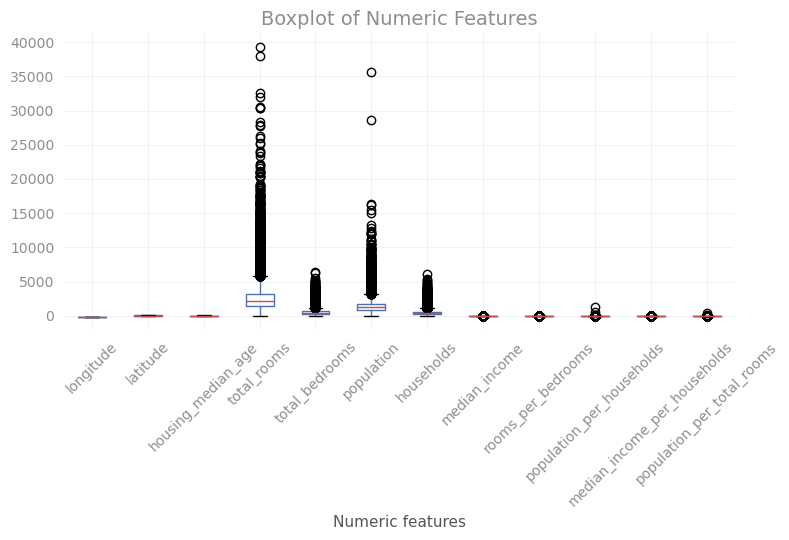

In [37]:
# Distribution of numeric features
with mpl.style.context(style):
    fig, ax = plt.subplots()
    housing.loc[:, ['longitude',
                    'latitude',
                    'ocean_proximity',
                    'housing_median_age',
                    'total_rooms',
                    'total_bedrooms',
                    'population',
                    'households',
                    'median_income',
                    'rooms_per_bedrooms',
                    'population_per_households',
                    'median_income_per_households',
                    'population_per_total_rooms'
                   ]].boxplot(rot=45, ax=ax)
    ax.set(
        title="Boxplot of Numeric Features",
        xlabel='Numeric features',
    )

Observation: Outliers exist, robust feature scaling is required.

In [38]:
# Feature scaling
housing['longitude'] = (housing['longitude'] - housing['longitude'].mean()) / housing['longitude'].std()
housing['latitude'] = (housing['latitude'] - housing['latitude'].mean()) / housing['latitude'].std()
housing['housing_median_age'] = (housing['housing_median_age'] - housing['housing_median_age'].mean()) / housing[
    'housing_median_age'].std()
housing['total_rooms'] = (housing['total_rooms'] - housing['total_rooms'].mean()) / housing['total_rooms'].std()
housing['total_bedrooms'] = (housing['total_bedrooms'] - housing['total_bedrooms'].mean()) / housing[
    'total_bedrooms'].std()
housing['population'] = (housing['population'] - housing['population'].mean()) / housing['population'].std()
housing['households'] = (housing['households'] - housing['households'].mean()) / housing['households'].std()
housing['median_income'] = (housing['median_income'] - housing['median_income'].mean()) / housing['median_income'].std()
housing['rooms_per_bedrooms'] = (housing['rooms_per_bedrooms'] - housing['rooms_per_bedrooms'].mean()) / housing['rooms_per_bedrooms'].std()
housing['population_per_households'] = (housing['population_per_households'] - housing['population_per_households'].mean()) / housing['population_per_households'].std()
housing['median_income_per_households'] = (housing['median_income_per_households'] - housing['median_income_per_households'].mean()) / housing['median_income_per_households'].std()

Visualize the effect of feature scaling on distribution of numeric variables

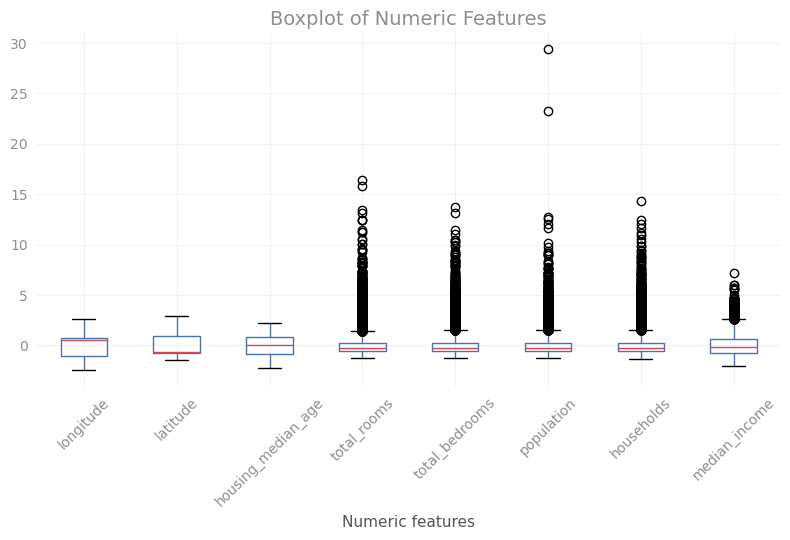

In [39]:
with mpl.style.context(style):
    fig, ax = plt.subplots()
    housing.loc[:, ['longitude',
                    'latitude',
                    'ocean_proximity',
                    'housing_median_age',
                    'total_rooms',
                    'total_bedrooms',
                    'population',
                    'households',
                    'median_income']].boxplot(rot=45, ax=ax)
    ax.set(
        title="Boxplot of Numeric Features",
        xlabel='Numeric features',
    )


Compute correlation of all numeric variables with respect to median_house_value

In [40]:
# Correlation with median_house_value
housing.drop(columns='ocean_proximity').corr()['median_house_value'].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.677337
ord_ocean_proximity             0.457428
rooms_per_bedrooms              0.356819
<1h_ocean                       0.319571
total_rooms                     0.160490
near_ocean                      0.144562
near_bay                        0.112134
households                      0.104022
total_bedrooms                  0.083986
median_income_per_households    0.053859
island                          0.033677
population                      0.026221
housing_median_age              0.016493
longitude                      -0.021018
population_per_households      -0.025576
population_per_total_rooms     -0.030317
latitude                       -0.173107
inland                         -0.501412
Name: median_house_value, dtype: float64

The features of interest are: 

[
    'longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 
    'households', 'median_income', 'median_house_value', 'ord_ocean_proximity', 'rooms_per_bedrooms', 
    'population_per_households', 'median_income_per_households', 'population_per_total_rooms'
]

## Summary

The following steps are required to prepare the dataset for Machine Learning
1. Read dataset
2. Clean/harmonize text fields
3. Drop rows with missing values in text fields
4. Seperate label
5. Split dataset into train and test sets
6. Fill missing numeric values in training set
7. Encode ocean_proximity
8. Create new features: ['rooms_per_bedrooms', 'population_per_households', 'median_income_per_households', 'population_per_total_rooms']
9. Train and validate several models
10. Choose evaluate and use best model